In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import pdist
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
import pandas
import sys
import tqdm.notebook as tqdm
from matplotlib.transforms import Bbox
sys.path.append('../src/')
#from diffusion_maps_tools import *

import parsimonious
import dm as diffusion_maps

plt.style.use('seaborn-white')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=21)
plt.rc('ytick', labelsize=21)
plt.rc('axes', labelsize=25)
plt.rc('font', family='serif')
plt.rc('font', family='serif')
plt.rcParams['image.cmap'] = 'Spectral'

# First Data Set

In [2]:
filename = 'data_01_optimization.xlsx'
Data = np.array(pandas.read_excel(filename, skiprows=2).iloc[:, 1:7])
print('The shape of input array is {}'.format(Data.shape))

The shape of input array is (999, 6)


In [3]:
minmax_scaler = MinMaxScaler(feature_range=(0,1)).fit(Data)
input_scaled = minmax_scaler.transform(Data)
#input_scaled = data_dmap

In [4]:
M = pdist(input_scaled,'euclidean')
eps = np.median(M**2)*5.0
eps

2.132829570007286

In [5]:
input_scaled[0,:]

array([0.07232984, 0.56174441, 0.9999998 , 0.99921611, 0.99999294,
       0.89444911])

In [6]:
'''DiffMaps = diffusion_maps_tools()
num_eigenpairs = 20
epsilon = 10
distance = DiffMaps.distance(points = input_scaled)
print(np.amax(distance))
kernel = DiffMaps.kernel(metric = distance, epsilon=eps**2)
kernel = DiffMaps.ker_normalize(kernel, alpha=0)
eigval, phi = DiffMaps.eigensolver(matrix = kernel,
                                   num_eigenpairs = num_eigenpairs)
print('    Eigenvalues are = {}'.format(eigval.real))'''

dmap_param_red = diffusion_maps.SparseDiffusionMaps(points = input_scaled,
                                                    epsilon = eps,
                                                    num_eigenpairs = 20,
                                                    cut_off = np.inf,  
                                                    renormalization = 1.0,
                                                    normalize_kernel = True)
phi = dmap_param_red.eigenvectors.T # dominant eigenvectors, including the trivial one

In [7]:
from subsample import subsample
(sub_data, idx) = subsample(phi, min_distance = 0.03)

residuals = parsimonious.DiffusionMap.compute_residuals(phi[idx,:], eps_scale = 3.0)["Residuals"] # subsample data
residuals

Subsampling points.
Considering min_distance 0.030000.
Subsampling complete, taking 440 out of 999 points.
Calculating 18 residuals


Calculating 18 residuals:   0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/440 [00:00<?, ?it/s]

  0%|          | 0/440 [00:00<?, ?it/s]

  0%|          | 0/440 [00:00<?, ?it/s]

  0%|          | 0/440 [00:00<?, ?it/s]

  0%|          | 0/440 [00:00<?, ?it/s]

  0%|          | 0/440 [00:00<?, ?it/s]

  0%|          | 0/440 [00:00<?, ?it/s]

  0%|          | 0/440 [00:00<?, ?it/s]

  0%|          | 0/440 [00:00<?, ?it/s]

  0%|          | 0/440 [00:00<?, ?it/s]

  0%|          | 0/440 [00:00<?, ?it/s]

  0%|          | 0/440 [00:00<?, ?it/s]

  0%|          | 0/440 [00:00<?, ?it/s]

  0%|          | 0/440 [00:00<?, ?it/s]

  0%|          | 0/440 [00:00<?, ?it/s]

  0%|          | 0/440 [00:00<?, ?it/s]

  0%|          | 0/440 [00:00<?, ?it/s]

  0%|          | 0/440 [00:00<?, ?it/s]

array([0.        , 1.        , 0.97058716, 0.76397424, 0.16592869,
       0.09690793, 0.13100706, 0.45275091, 0.06495658, 0.03946755,
       0.0381906 , 0.0791656 , 0.05483635, 0.02587763, 0.0716758 ,
       0.0352317 , 0.05957415, 0.03806418, 0.02607558, 0.01377871])

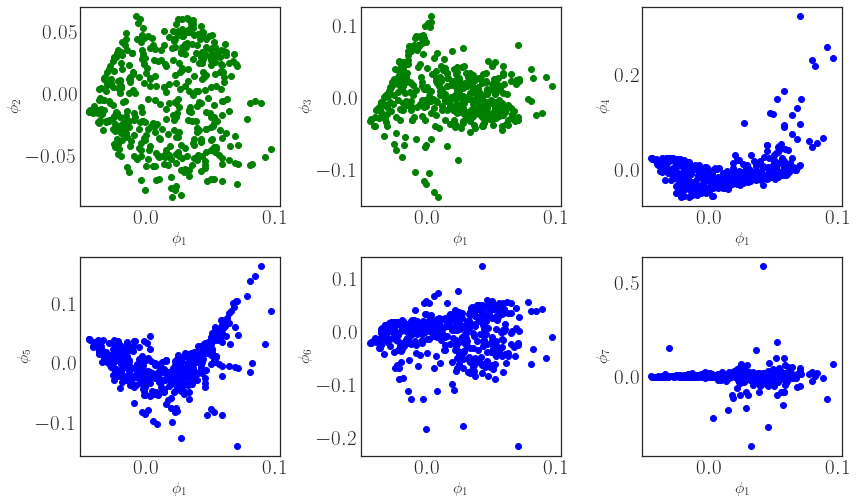

In [8]:
fig_dmaps_evecs = plt.figure(figsize = (12, 10))
for i in range (2,8):
    if residuals[i] > 0.5:
        fmt = "go"
    else:
        fmt = "bo"
    ax = fig_dmaps_evecs.add_subplot(3, 3, i-1)
    ax.plot(phi[idx,1], phi[idx,i], fmt)
    ax.set_xlabel(r"$\phi_1$", fontsize = 16)
    ax.set_ylabel(r"$\phi_{%d}$" % i, fontsize = 16)
    ax.grid(False)
plt.tight_layout()

In [9]:
evecs = phi[:,1:4]

## PCA

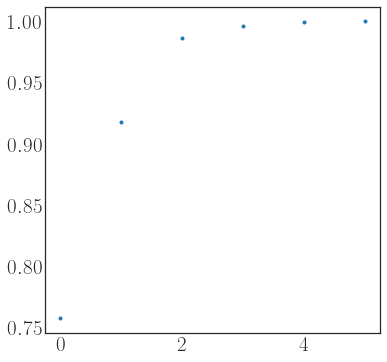

In [10]:
# [U, S, V] = np.linalg.svd(Data - np.mean(Data,axis=0))
[U, S, V] = np.linalg.svd(Data)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.plot(np.cumsum(S)/sum(S),'.')

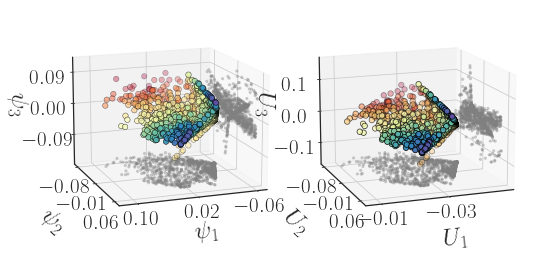

In [11]:
fig = plt.figure(figsize=(8//1.1,5//1.1))
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.scatter(evecs[:,0],evecs[:,1],evecs[:,2],s=30,c = evecs[:,1],edgecolors = 'black',linewidth = 0.5)
p = ax.scatter(evecs[:,0],evecs[:,1],(np.min(evecs[:,2]-0.02))*np.ones_like(evecs[:,2]),marker = '.',c ='grey',alpha = 0.3)
p = ax.scatter(np.min(evecs[:,0]-0.02)*np.ones_like(evecs[:,1]),(evecs[:,1]),(evecs[:,2]),marker = '.' ,c ='grey',alpha = 0.3)

ax.xaxis.labelpad=5
ax.yaxis.labelpad=15
ax.zaxis.labelpad=17
ax.set_xlabel(r"$\psi_1$")
ax.set_xticks(np.array([-0.06,0.02, 0.1,]))
ax.set_ylabel(r"$\psi_{2}$")
ax.set_yticks(np.array([-0.08,-0.01, 0.06]))
ax.set_zlabel(r"$\psi_{3}$")
ax.set_zticks(np.linspace(-0.18, 0.18, 5))
ax.tick_params(axis="z",direction="out", pad=10)
ax.tick_params(axis="x",direction="out", pad=-3)
ax.set_xlim(-0.07,0.12)


ax.view_init(14,70)
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.scatter(U[:,0],U[:,1],-U[:,2],s=30,c = U[:,1],edgecolors = 'black',linewidth = 0.75)
p = ax.scatter(U[:,0],evecs[:,1],np.min(U[:,2]-0.02)*np.ones_like(U[:,2]),marker = '.',c ='grey',alpha = 0.3)
p = ax.scatter(np.min(U[:,0]-0.005)*np.ones_like(U[:,1]),(U[:,1]),(U[:,2]),marker = '.' ,c ='grey',alpha = 0.3)
ax.xaxis.labelpad=10
ax.yaxis.labelpad=17
ax.zaxis.labelpad=17
ax.set_xlabel(r"$U_1$")
ax.set_xticks(np.array([-0.010,-0.03,-0.05]))
ax.set_ylabel(r"$U_{2}$")
ax.set_yticks(np.array([-0.08,-0.01, 0.06]))
ax.set_zlabel(r"$U_{3}$")
# ax.set_zticks(np.linspace(-0.18, 0.18, 5))
ax.tick_params(axis="z",direction="out", pad=10)
ax.tick_params(axis="x",direction="out", pad=-3)
# ax.set_xlim(-0.055,-0.005)
plt.tight_layout()
ax.view_init(14,70)

## PCA Subtract Mean

In [12]:
[U, S, V] = np.linalg.svd(Data - np.mean(Data,axis=0))

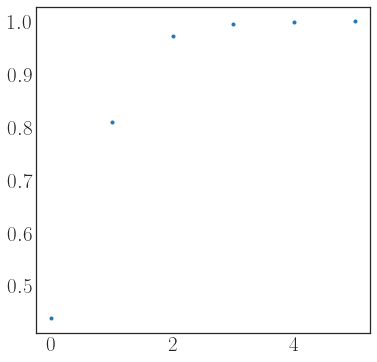

In [13]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.plot(np.cumsum(S)/sum(S),'.')

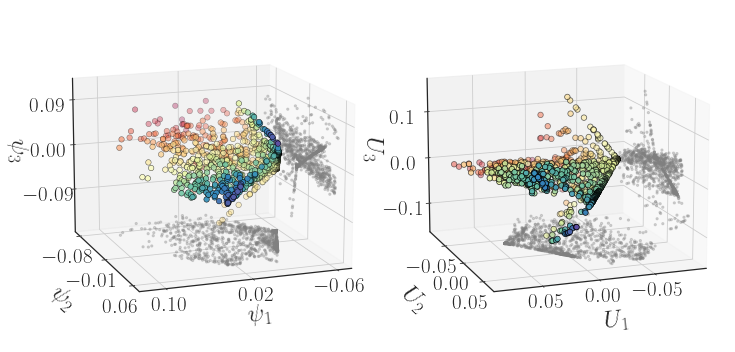

In [14]:
fig = plt.figure(figsize=(12//1.1,6//1.1))
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.scatter(evecs[:,0],evecs[:,1],evecs[:,2],s=30,c = evecs[:,1],edgecolors = 'black',linewidth = 0.5)
p = ax.scatter(evecs[:,0],evecs[:,1],(np.min(evecs[:,2]-0.02))*np.ones_like(evecs[:,2]),marker = '.',c ='grey',alpha = 0.3)
p = ax.scatter(np.min(evecs[:,0]-0.02)*np.ones_like(evecs[:,1]),(evecs[:,1]),(evecs[:,2]),marker = '.' ,c ='grey',alpha = 0.3)

ax.xaxis.labelpad=5
ax.yaxis.labelpad=15
ax.zaxis.labelpad=17
ax.set_xlabel(r"$\psi_1$")
ax.set_xticks(np.array([-0.06,0.02, 0.1,]))
ax.set_ylabel(r"$\psi_{2}$")
ax.set_yticks(np.array([-0.08,-0.01, 0.06]))
ax.set_zlabel(r"$\psi_{3}$")
ax.set_zticks(np.linspace(-0.18, 0.18, 5))
ax.tick_params(axis="z",direction="out", pad=10)
ax.tick_params(axis="x",direction="out", pad=-3)
ax.set_xlim(-0.07,0.12)


ax.view_init(14,70)
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.scatter(-U[:,0],U[:,1],U[:,2],s=30,c = U[:,1],edgecolors = 'black',linewidth = 0.75)
p = ax.scatter(U[:,0],evecs[:,1],np.min(U[:,2]-0.02)*np.ones_like(U[:,2]),marker = '.',c ='grey',alpha = 0.3)
p = ax.scatter(np.min(U[:,0]-0.005)*np.ones_like(U[:,1]),(U[:,1]),(U[:,2]),marker = '.' ,c ='grey',alpha = 0.3)
ax.xaxis.labelpad=10
ax.yaxis.labelpad=17
ax.zaxis.labelpad=17
ax.set_xlabel(r"$U_1$")
# ax.set_xticks(np.array([-0.010,-0.03,-0.05]))
ax.set_ylabel(r"$U_{2}$")
# ax.set_yticks(np.array([-0.08,-0.01, 0.06]))
ax.set_zlabel(r"$U_{3}$")
# ax.set_zticks(np.linspace(-0.18, 0.18, 5))
ax.tick_params(axis="z",direction="out", pad=10)
ax.tick_params(axis="x",direction="out", pad=-3)
# ax.set_xlim(-0.055,-0.005)
plt.tight_layout()
ax.view_init(14,70)